01 
Data set with costumers, state, income, vehicle, insurance policy, ...
Make model to predict total claim amount

02 getting the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
mca = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv') #importing data frame

03 cleaning data, handling NaN, converting date data

In [3]:
def clean_dataset(data,c1,c2):
    '''function to clean a dataset'''
    
    #define accepted values
    c1 = float(c1)
    c2 = float(c2)
    
    data_c = data.copy() #creates a copy of dataframe
    data_c = data_c.iloc[:,1:] #drops unamed column
    
    display(data_c.shape)  #displays shape
    
    #changing header names
    cols = []
    #lowering cases and replacing space with underscore
    for i in data_c.columns: cols.append(i.lower().replace(' ','_')) 
    data_c.columns = cols 
    cols = []
    
    datan = data_c._get_numeric_data()
    datao = data_c.select_dtypes(include=['object'])
    
    display(datan) #displays numerical columns
    display(datao) #displays categorical columns

    data_c = data_c.drop_duplicates(subset=None,keep='first') #removes duplicates
    
    #dealing with NaN 
    for col in datan.columns:
        perc = datan[col].isnull().sum()/len(datan)*100
        if perc <= c1:
            datan.dropna(subset=col, inplace=True)
        elif perc <= c2:
            median1 = datan[col].median()
            datan[col] = datan[col].fillna(median1)
        else:
            datan[col] = datan[col].fillna('Unknown')

    for col in datao.columns:
        perc = datao[col].isnull().sum()/len(datao)*100
        if perc <= c1:
            datao.dropna(subset=col, inplace=True)
        else:
            datao[col] = datao[col].fillna('Unknown')   
        
    #regrouping
    data_f = pd.DataFrame(columns=data_c.columns)
    data_f = pd.concat([datao,datan], axis=1)
    data_f.dropna(inplace=True)
    
    #handling date
    #correcting wrong date input
    display(data_f)
    data_f['effective_to_date'] = pd.to_datetime(data_f['effective_to_date'], errors='coerce')
    display(data_f['effective_to_date'])
    
    #creating list for months
    month1 = []
    for i in data_f['effective_to_date']: month1.append(i.month)
    
    #filtering Jan to March
    display(data_f[data_f['effective_to_date'].dt.month <=3])

    return data_f

In [4]:
mca_clean = clean_dataset(mca,6,10)

(9134, 23)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,...,Two-Door Car,Medsize,2763.519279,56274,69,32,5,0,1,384.811147
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,...,Four-Door Car,Medsize,6979.535903,0,94,13,42,0,8,1131.464935
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,...,Two-Door Car,Medsize,12887.431650,48767,108,18,38,0,2,566.472247
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,...,SUV,Medsize,7645.861827,0,106,18,65,0,7,529.881344
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,...,Four-Door Car,Medsize,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,...,Four-Door Car,Medsize,23405.987980,71941,73,18,89,0,2,198.234764
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,...,Four-Door Car,Medsize,3096.511217,21604,79,14,28,0,1,379.200000
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,...,Four-Door Car,Medsize,8163.890428,0,85,9,37,3,2,790.784983
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,...,Four-Door Car,Large,7524.442436,21941,96,34,3,0,3,691.200000


0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,...,Two-Door Car,Medsize,2763.519279,56274,69,32,5,0,1,384.811147
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,...,Four-Door Car,Medsize,6979.535903,0,94,13,42,0,8,1131.464935
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,...,Two-Door Car,Medsize,12887.431650,48767,108,18,38,0,2,566.472247
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,...,SUV,Medsize,7645.861827,0,106,18,65,0,7,529.881344
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,...,Four-Door Car,Medsize,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,...,Four-Door Car,Medsize,23405.987980,71941,73,18,89,0,2,198.234764
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,...,Four-Door Car,Medsize,3096.511217,21604,79,14,28,0,1,379.200000
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,...,Four-Door Car,Medsize,8163.890428,0,85,9,37,3,2,790.784983
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,...,Four-Door Car,Large,7524.442436,21941,96,34,3,0,3,691.200000


03 exploration

In [5]:
mca_n = mca_clean._get_numeric_data()

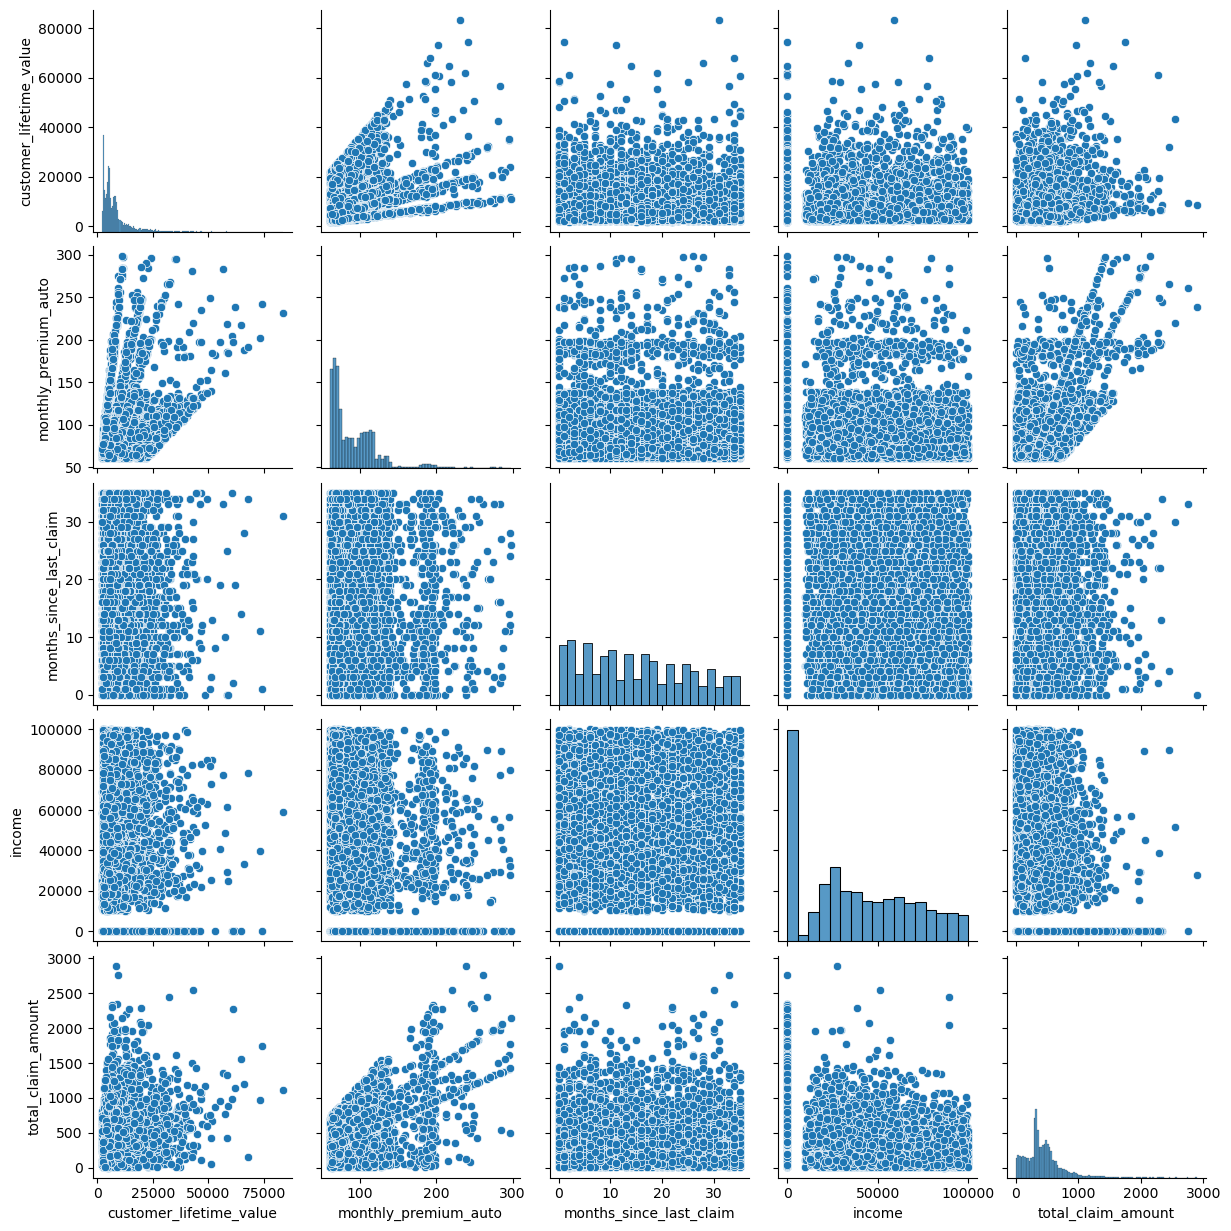

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(mca_n[['customer_lifetime_value','monthly_premium_auto','months_since_last_claim','income','total_claim_amount']])

<AxesSubplot:>

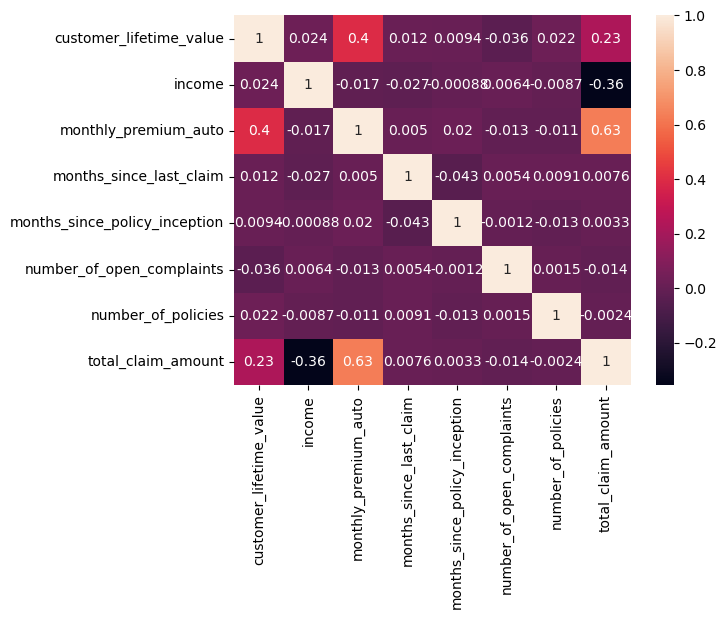

In [11]:
mca_corr = mca_n.corr()
sns.heatmap(mca_corr, annot=True)
#confirming that columns not plotted on the pairplot do not have higher correlation with total claim amount
#there is no correlation greater than 0.9

In [8]:
#making the dataframe to do the model prediciton later
mca_sel = mca_n.drop(['months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies'], axis=1)
mca_sel.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


Lab 5

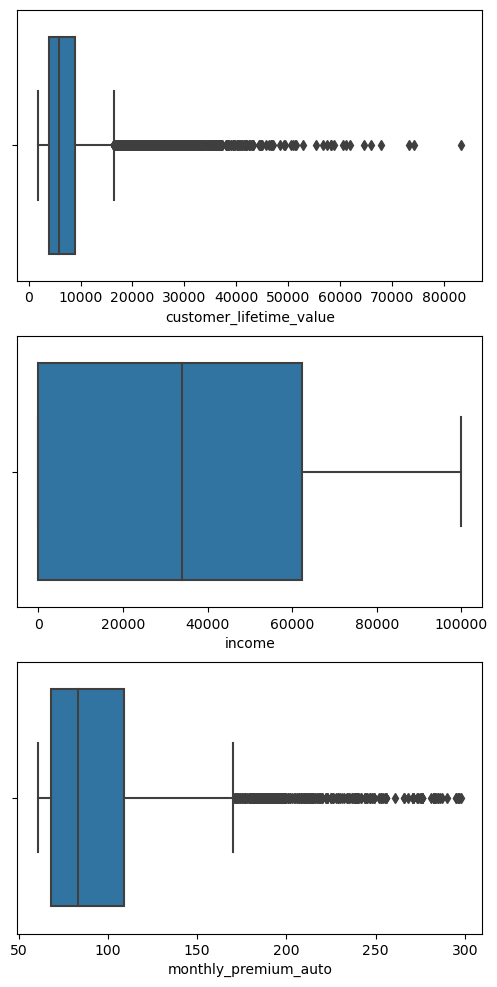

In [12]:
fig, ax = plt.subplots(3,1,figsize=(6,12))
sns.boxplot(x='customer_lifetime_value', data=mca_sel, ax = ax[0])
sns.boxplot(x='income', data=mca_sel, ax = ax[1])
sns.boxplot(x='monthly_premium_auto', data=mca_sel, ax = ax[2])
plt.show()

04 dealing with outliers

In [70]:
#removing outliers

#customer lifetime value
iqr_clv = np.percentile(mca_sel['customer_lifetime_value'],75) - np.percentile(mca_sel['customer_lifetime_value'],25)
upper_limit = np.percentile(mca_sel['customer_lifetime_value'],75) + 1.5*iqr_clv
lower_limit = np.percentile(mca_sel['customer_lifetime_value'],25) - 1.5*iqr_clv
x_out = mca_sel[(mca_sel['customer_lifetime_value']>lower_limit) & (mca_sel['customer_lifetime_value']<upper_limit)]

#income
iqr_inc = np.percentile(mca_sel['income'],75) - np.percentile(mca_sel['income'],25)
upper_limit = np.percentile(mca_sel['income'],75) + 1.5*iqr_inc
lower_limit = np.percentile(mca_sel['income'],25) - 1.5*iqr_inc
x_out2 = x_out[(x_out['income']>lower_limit) & (x_out['income']<upper_limit)]

#montly premium auto
iqr_mpa = np.percentile(mca_sel['monthly_premium_auto'],75) - np.percentile(mca_sel['monthly_premium_auto'],25)
upper_limit = np.percentile(mca_sel['monthly_premium_auto'],75) + 1.5*iqr_mpa
lower_limit = np.percentile(mca_sel['monthly_premium_auto'],25) - 1.5*iqr_mpa
x_out3 = x_out2[(x_out2['monthly_premium_auto']>lower_limit) & (x_out2['monthly_premium_auto']<upper_limit)]

04 splitting x and y

In [72]:
y_out = x_out3['total_claim_amount']
x_out4 = x_out3.drop(['total_claim_amount'], axis=1)
x_out4.describe()

,customer_lifetime_value,income,monthly_premium_auto
count,8033.000000,8033.000000,8033.000000
mean,6126.232644,37673.762480,87.015063
std,3127.470319,30469.982514,22.671643
min,1898.007675,0.000000,61.000000
25%,3671.818326,0.000000,68.000000
50%,5365.541610,33816.000000,79.000000
75%,8044.872393,62366.000000,105.000000
max,16407.664610,99981.000000,170.000000


04 Normalizing

In [76]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

x_out_norm = MinMaxScaler().fit(x_out4).transform(x_out4)
pd.DataFrame(x_out_norm, columns=x_out4.columns)

x_out_std = StandardScaler().fit(x_out_norm).transform(x_out_norm)
print(x_out_std.shape)
x_out_std = pd.DataFrame(x_out_std, columns=x_out4.columns)

(8033, 3)


05 Applying model

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#split between train and test sets

#I am fixing random in order to compare later to other datasets
x_train, x_test, y_train, y_test = train_test_split(x_out_std, y_out, test_size=0.3, random_state=42)
#choosing 0.3 as we have 8033 data points

#applying linear regression
lm = LinearRegression().fit(x_train, y_train)

#predicting y from train and test sets
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)

b = lm.intercept_
m = lm.coef_  

06 Model Validation

In [78]:
#scoring
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt 
#R2
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
#MSE
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_test, y_test)
#RMSE
rmse_train = sqrt(mean_squared_error(y_pred_train, y_train))
rmse_test = sqrt(mean_squared_error(y_pred_test, y_test))
#MAE
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)

print(r2_train, mse_train, rmse_train, mae_train)
print(r2_test, mse_test, rmse_test, mae_test)

-0.4929114199918574 33042.85614071445 181.7769406187552 133.92380932069543
-0.5381981613808895 33146.820511111495 182.06268291748174 135.71941805151621


07 Reporting

In [31]:
#y = b + m*x

In [68]:
b

401.66351932917013

In [34]:
m

array([ -5.56077519, -91.73542634, 115.57521434])

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

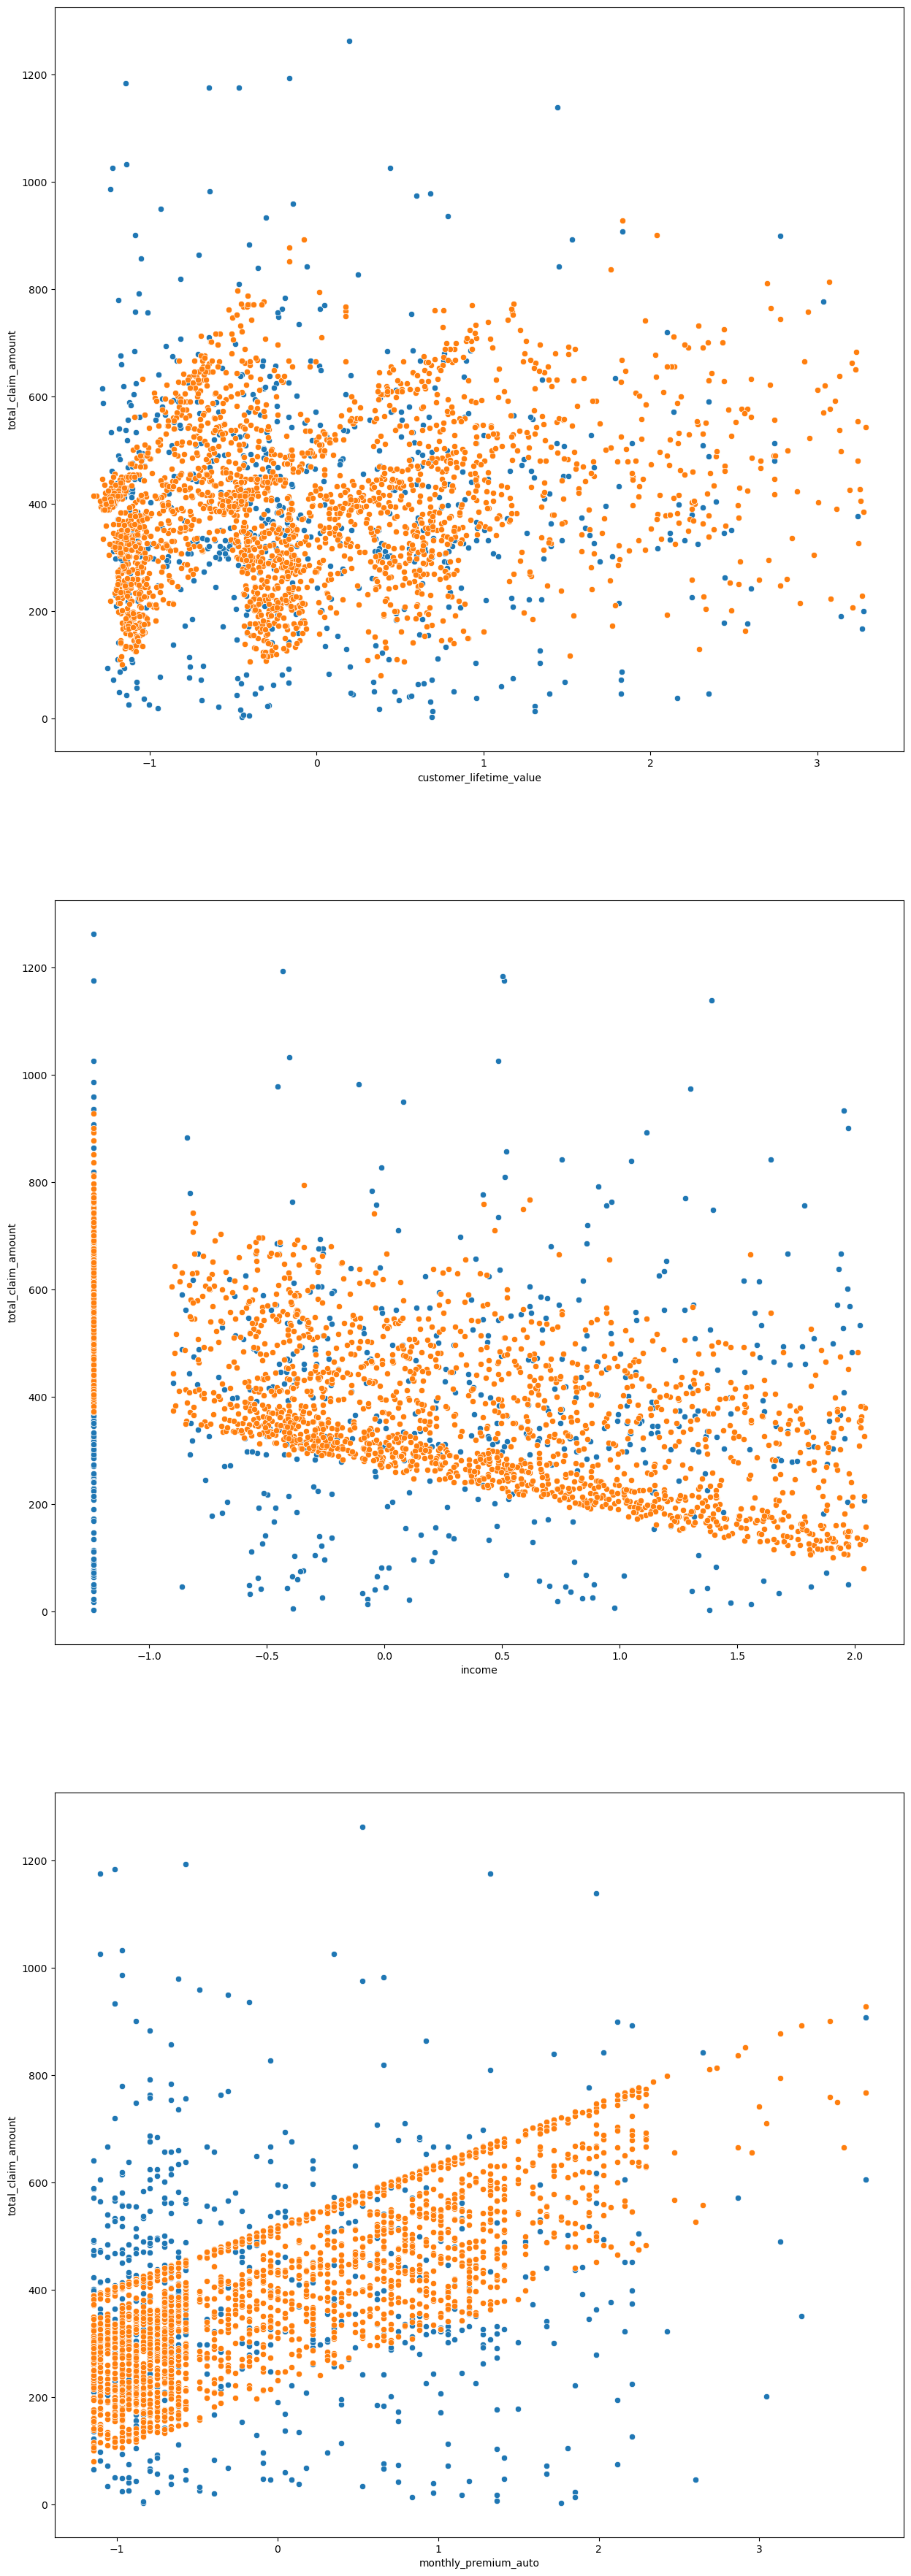

In [79]:
fig, ax = plt.subplots(3,1,figsize=(15,45))
sns.scatterplot(x = x_test['customer_lifetime_value'], y = y_test, ax = ax[0])
sns.scatterplot(x = x_test['customer_lifetime_value'], y = y_pred_test, ax = ax[0])

sns.scatterplot(x = x_test['income'], y = y_test, ax = ax[1])
sns.scatterplot(x = x_test['income'], y = y_pred_test, ax = ax[1])

sns.scatterplot(x = x_test['monthly_premium_auto'], y = y_test, ax = ax[2])
sns.scatterplot(x = x_test['monthly_premium_auto'], y = y_pred_test, ax = ax[2])

In [ ]:
not a very good model